In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d parulpandey/emotion-dataset

  0% 0.00/715k [00:00<?, ?B/s]
100% 715k/715k [00:00<00:00, 116MB/s]


In [4]:
import zipfile

In [5]:
zip=zipfile.ZipFile('/content/emotion-dataset.zip')
zip.extractall('/content')
zip.close()

In [6]:
df_test=pd.read_csv('/content/test.csv')
df_train=pd.read_csv('/content/training.csv')

In [7]:
df_train.shape

(16000, 2)

In [8]:
df_test.shape

(2000, 2)

In [9]:
labels_dict = {0:'sadness', 1:'joy', 2:'love', 3:'anger', 4:'fear', 5:'surprise'}

In [10]:
df_train['label_name'] = df_train['label'].map(labels_dict)
df_train.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [11]:
df_train

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger
...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,sadness
15996,i am now turning and i feel pathetic that i am...,0,sadness
15997,i feel strong and good overall,1,joy
15998,i feel like this was such a rude comment and i...,3,anger


<Axes: xlabel='label_name', ylabel='count'>

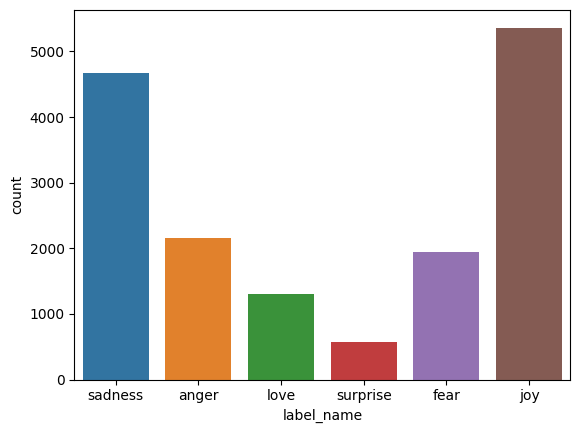

In [12]:
sns.countplot(data=df_train,x='label_name')

In [13]:
df_train.isnull().sum()

text          0
label         0
label_name    0
dtype: int64

In [14]:
df_train[df_train.duplicated()]

,text,label,label_name
13846,i feel more adventurous willing to take risks ...,1,joy


In [15]:
df_train.drop_duplicates(inplace=True)

In [16]:
df_train.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [18]:
df_train['text_len']=df_train['text'].apply(len)
df_train['num_words']=df_train['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df_train['No_sent']=df_train['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [19]:
df_train

,text,label,label_name,text_len,num_words,No_sent
0,i didnt feel humiliated,0,sadness,23,4,1
1,i can go from feeling so hopeless to so damned...,0,sadness,108,21,1
2,im grabbing a minute to post i feel greedy wrong,3,anger,48,10,1
3,i am ever feeling nostalgic about the fireplac...,2,love,92,18,1
4,i am feeling grouchy,3,anger,20,4,1
...,...,...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,sadness,101,24,1
15996,i am now turning and i feel pathetic that i am...,0,sadness,102,20,1
15997,i feel strong and good overall,1,joy,30,6,1
15998,i feel like this was such a rude comment and i...,3,anger,59,14,1


In [20]:
with_sadness=df_train['label']==0
with_anger=df_train['label']==3
with_joy=df_train['label']==1
with_love=df_train['label']==2

<Axes: xlabel='text_len', ylabel='Count'>

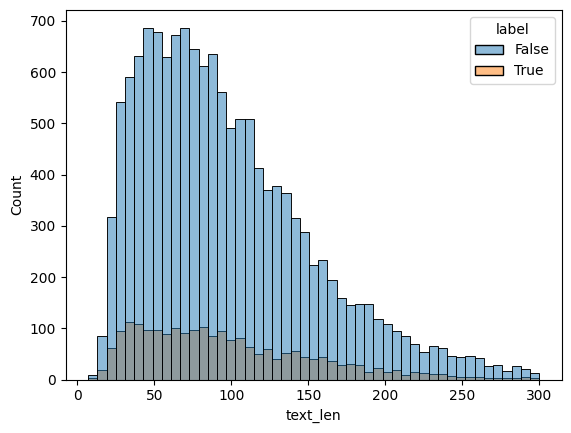

In [21]:
sns.histplot(data=df_train,x='text_len',hue=with_anger)

<Axes: xlabel='text_len', ylabel='Count'>

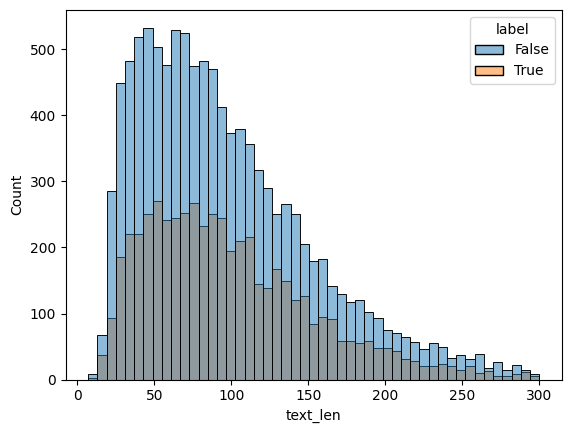

In [22]:
sns.histplot(data=df_train,x='text_len',hue=with_joy)

<Axes: xlabel='text_len', ylabel='Count'>

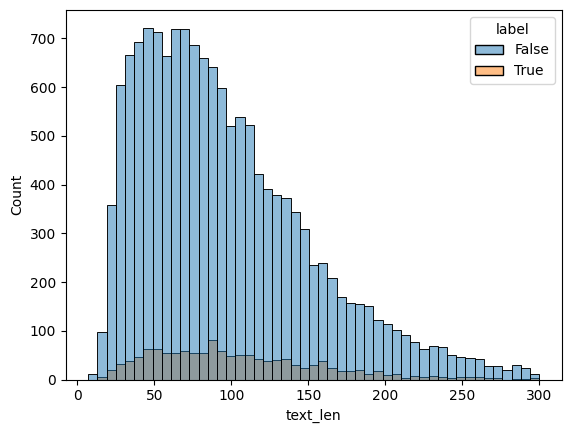

In [23]:
sns.histplot(data=df_train,x='text_len',hue=with_love)

In [24]:
corr=df_train.corr()

<ipython-input-24-0d8469c610b8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df_train.corr()


<Axes: >

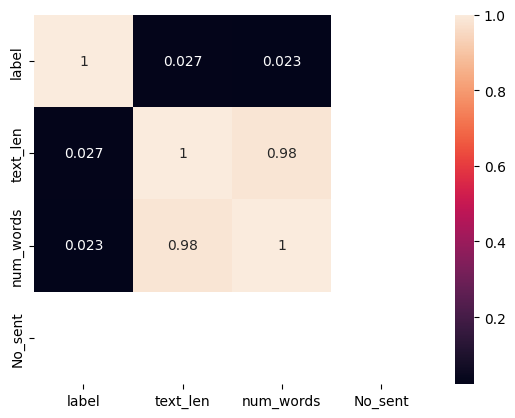

In [25]:
sns.heatmap(corr,annot=True)

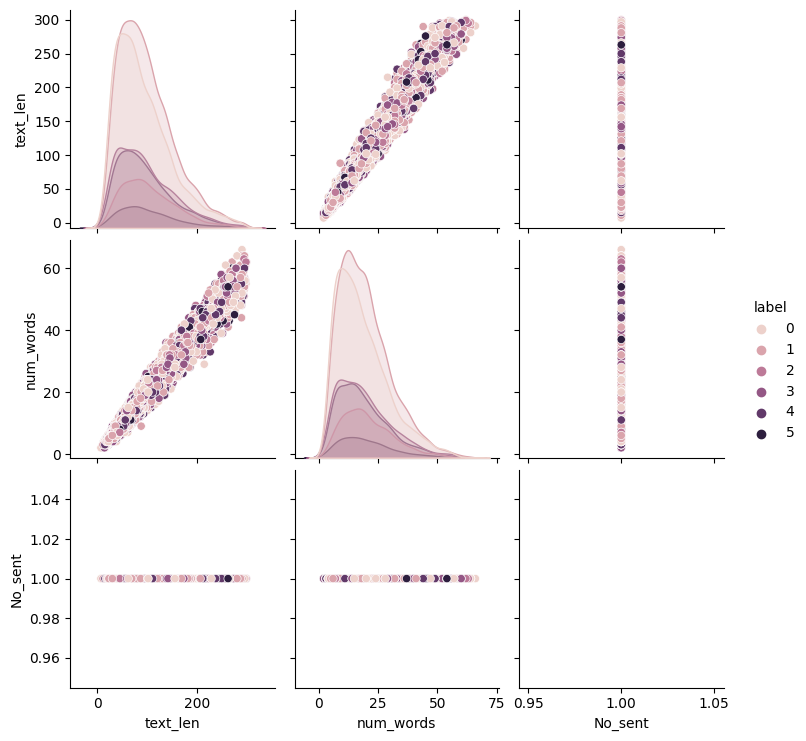

In [26]:
sns.pairplot(df_train,hue='label')

In [27]:
df_train

,text,label,label_name,text_len,num_words,No_sent
0,i didnt feel humiliated,0,sadness,23,4,1
1,i can go from feeling so hopeless to so damned...,0,sadness,108,21,1
2,im grabbing a minute to post i feel greedy wrong,3,anger,48,10,1
3,i am ever feeling nostalgic about the fireplac...,2,love,92,18,1
4,i am feeling grouchy,3,anger,20,4,1
...,...,...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,sadness,101,24,1
15996,i am now turning and i feel pathetic that i am...,0,sadness,102,20,1
15997,i feel strong and good overall,1,joy,30,6,1
15998,i feel like this was such a rude comment and i...,3,anger,59,14,1


In [28]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [29]:
def transfer_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  return " ".join(y)

In [30]:
df_train['transfer_test']=df_train['text'].apply(transfer_text)

In [31]:
df_train.head()

,text,label,label_name,text_len,num_words,No_sent,transfer_test
0,i didnt feel humiliated,0,sadness,23,4,1,didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,0,sadness,108,21,1,go feeling hopeless damned hopeful around some...
2,im grabbing a minute to post i feel greedy wrong,3,anger,48,10,1,im grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,2,love,92,18,1,ever feeling nostalgic fireplace know still pr...
4,i am feeling grouchy,3,anger,20,4,1,feeling grouchy


In [32]:
from wordcloud import WordCloud

In [33]:
wc= WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1')

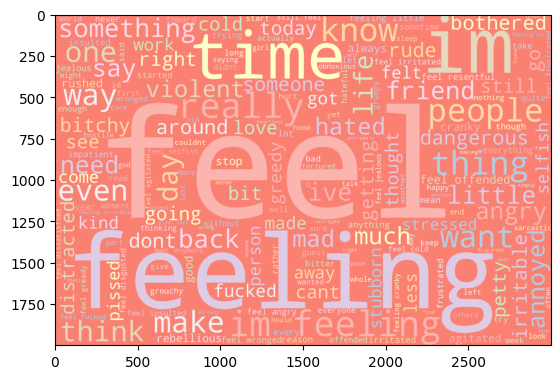

In [34]:
anger=wc.generate(df_train[df_train['label']==3]['transfer_test'].str.cat(sep=' '))
plt.imshow(anger)

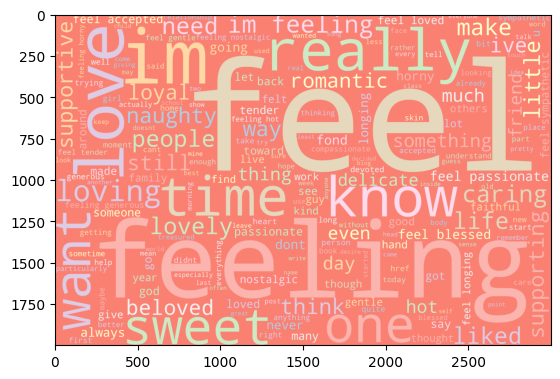

In [35]:
love=wc.generate(df_train[df_train['label']==2]['transfer_test'].str.cat(sep=' '))
plt.imshow(love)

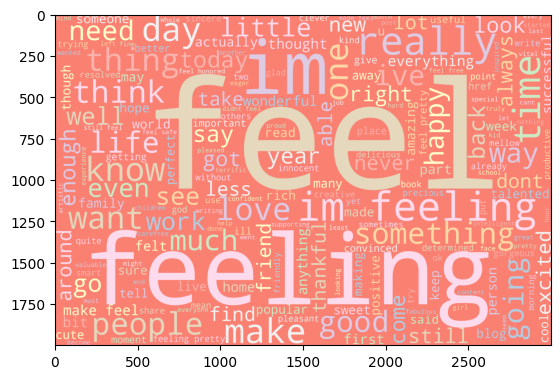

In [36]:
joy=wc.generate(df_train[df_train['label']==1]['transfer_test'].str.cat(sep=' '))
plt.imshow(joy)

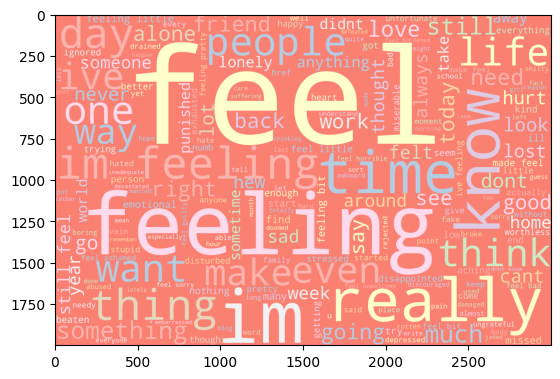

In [37]:
sadness=wc.generate(df_train[df_train['label']==0]['transfer_test'].str.cat(sep=' '))
plt.imshow(sadness)

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [39]:
df_train.head()

,text,label,label_name,text_len,num_words,No_sent,transfer_test
0,i didnt feel humiliated,0,sadness,23,4,1,didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,0,sadness,108,21,1,go feeling hopeless damned hopeful around some...
2,im grabbing a minute to post i feel greedy wrong,3,anger,48,10,1,im grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,2,love,92,18,1,ever feeling nostalgic fireplace know still pr...
4,i am feeling grouchy,3,anger,20,4,1,feeling grouchy


In [40]:
from imblearn.over_sampling import SMOTE

In [42]:
X_train, X_test, y_train, y_test = train_test_split(df_train['transfer_test'],df_train['label'],test_size=0.2, random_state=42,stratify=df_train['label'])

In [43]:
smote=SMOTE()

In [44]:
X_train.shape,y_train.shape

((12799,), (12799,))

In [45]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [46]:
X_res_train,Y_res_train=smote.fit_resample(X_train_vec,y_train)

In [47]:
Y_res_train.value_counts()

2    4289
1    4289
0    4289
4    4289
3    4289
5    4289
Name: label, dtype: int64

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

In [49]:
dtc=DecisionTreeClassifier()
lr=LogisticRegression(multi_class='multinomial',)
rfc=RandomForestClassifier()
gbc=GradientBoostingClassifier()
adc=AdaBoostClassifier()
svm = SVC(C=1, kernel='linear')
mnb=MultinomialNB()

In [50]:
for model in [lr,dtc,rfc,gbc,adc,svm,mnb]:
  print(model,'......................................................')
  abc=model.fit(X_res_train, Y_res_train)
  Y_pred_train=abc.predict(X_res_train)
  Y_pred_test=abc.predict(X_test_vec)
  As_train=accuracy_score(Y_pred_train,Y_res_train)
  As_test=accuracy_score(Y_pred_test,y_test)
  cm = confusion_matrix(Y_pred_test, y_test)
  cr = classification_report(Y_pred_test, y_test)






  print("training Accuracy score \n", As_train)
  print("=========="*3)
  print("testing Accuracy score \n", As_test)
  print("=========="*3)
  print("Confusion matrix \n", cm)
  print("=========="*3)
  print("CLASSIFICATION REPORT \n", cr)
  print("=========="*3)

LogisticRegression(multi_class='multinomial') ......................................................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


training Accuracy score 
 0.9711276909924613
testing Accuracy score 
 0.8878125
Confusion matrix 
 [[842  12   3  19  12   0]
 [ 39 966  24  10  11   3]
 [  7  73 229   3   1   1]
 [ 20   9   2 383  18   1]
 [ 22   6   3  16 325  13]
 [  3   6   0   1  21  96]]
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.90      0.95      0.92       888
           1       0.90      0.92      0.91      1053
           2       0.88      0.73      0.80       314
           3       0.89      0.88      0.89       433
           4       0.84      0.84      0.84       385
           5       0.84      0.76      0.80       127

    accuracy                           0.89      3200
   macro avg       0.87      0.85      0.86      3200
weighted avg       0.89      0.89      0.89      3200

DecisionTreeClassifier() ......................................................
training Accuracy score 
 0.998873086189477
testing Accuracy score 
 0.8684375
Confusion ma

In [51]:
clflr = LogisticRegression()
clflr.fit(X_res_train, Y_res_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
predictions = clflr.predict(X_test_vec)

In [53]:
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.89
Confusion Matrix:
[[842  39   7  20  22   3]
 [ 12 966  73   9   6   6]
 [  3  24 229   2   3   0]
 [ 19  10   3 383  16   1]
 [ 12  11   1  18 325  21]
 [  0   3   1   1  13  96]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       933
           1       0.92      0.90      0.91      1072
           2       0.73      0.88      0.80       261
           3       0.88      0.89      0.89       432
           4       0.84      0.84      0.84       388
           5       0.76      0.84      0.80       114

    accuracy                           0.89      3200
   macro avg       0.85      0.87      0.86      3200
weighted avg       0.89      0.89      0.89      3200



In [54]:
clf = MultinomialNB()
clf.fit(X_res_train, Y_res_train)

MultinomialNB()

In [55]:
predictions = clf.predict(X_test_vec)

In [56]:
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.84
Confusion Matrix:
[[809  36  13  32  30  13]
 [ 25 902  79  25  19  22]
 [  6  30 216   4   3   2]
 [ 19  12   5 373  18   5]
 [ 17  16   7  17 307  24]
 [  4  10   1   3  14  82]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       933
           1       0.90      0.84      0.87      1072
           2       0.67      0.83      0.74       261
           3       0.82      0.86      0.84       432
           4       0.79      0.79      0.79       388
           5       0.55      0.72      0.63       114

    accuracy                           0.84      3200
   macro avg       0.77      0.82      0.79      3200
weighted avg       0.85      0.84      0.84      3200



In [57]:
X_test = vectorizer.transform(df_test['text'])

In [58]:
predictions = clf.predict(X_test)

In [59]:
df_test['predicted_label'] = predictions

In [60]:
df_test

,text,label,predicted_label
0,im feeling rather rotten so im not very ambiti...,0,0
1,im updating my blog because i feel shitty,0,0
2,i never make her separate from me because i do...,0,0
3,i left with my bouquet of red and yellow tulip...,1,1
4,i was feeling a little vain when i did this one,0,0
...,...,...,...
1995,i just keep feeling like someone is being unki...,3,3
1996,im feeling a little cranky negative after this...,3,3
1997,i feel that i am useful to my people and that ...,1,1
1998,im feeling more comfortable with derby i feel ...,1,1


In [61]:
print(df_test[['text', 'predicted_label']])

                                                   text  predicted_label
0     im feeling rather rotten so im not very ambiti...                0
1             im updating my blog because i feel shitty                0
2     i never make her separate from me because i do...                0
3     i left with my bouquet of red and yellow tulip...                1
4       i was feeling a little vain when i did this one                0
...                                                 ...              ...
1995  i just keep feeling like someone is being unki...                3
1996  im feeling a little cranky negative after this...                3
1997  i feel that i am useful to my people and that ...                1
1998  im feeling more comfortable with derby i feel ...                1
1999  i feel all weird when i have to meet w people ...                5

[2000 rows x 2 columns]


#Conclusion:

Based on the provided metrics, Logistic Regression seems to be performing well with a good balance between training and testing accuracy. It provides solid performance across different classes.


Decision Tree and Random Forest show high training accuracy but comparatively lower testing accuracy, suggesting potential overfitting.
Gradient Boosting and Support Vector Classifier also show good performance but with slightly lower accuracy compared to Logistic Regression.
AdaBoost performs poorly, and Multinomial Naive Bayes has a reasonable performance but is not the best.


In summary, Logistic Regression appears to be the most suitable model for this classification task, given the provided metrics. However, it's also crucial to consider the specific requirements of your application and whether any trade-offs between precision, recall, or other metrics are acceptable.

```
# This is formatted as code
```

